# Spotify Hip-Hop Artist Comparison:
In this project, **I will be determining whether song length affects its popularity** between two similar hip-hop artists, Lil Uzi Vert and Travis Scott, who both have a heavy use in auto tune for their feel-good music as well as a large following.

**Null hypothesis**: Song length does not affect popularity.

**Alternative hypothesis**: Song length has an affect on popularity.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
sns.set(style='whitegrid')
df = pd.read_csv('CSV_Files/top_hiphop_artists_tracks.csv') 
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


This is the data I will be using throughout the project.

In [7]:
artists_to_compare = ['Lil Uzi Vert', 'Travis Scott']
filtered = df[df['Artist'].isin(artists_to_compare)]
filtered['Artist'].value_counts() # Checking to see if I have the two artists in the filtered data set.
Uzi_v_Travis = filtered
Uzi_v_Travis.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
7,Travis Scott,MELTDOWN (feat. Drake),86,246133,67nepsnrcZkowTxMWigSbb
30,Travis Scott,FE!N (feat. Playboi Carti),93,191700,42VsgItocQwOQC3XWZ8JNA
31,Travis Scott,I KNOW ?,92,211582,6wsqVwoiVH2kde4k4KKAFU
32,Travis Scott,MY EYES,91,251249,4kjI1gwQZRKNDkw1nI475M
33,Travis Scott,goosebumps,89,243836,6gBFPUFcJLzWGx4lenP6h2


Travis Scott is very present at the top, so I'm going to use .tail() to check if Lil Uzi Vert is in the data too.

In [8]:
Uzi_v_Travis.tail() 

,Artist,Track Name,Popularity,Duration (ms),Track ID
335,Lil Uzi Vert,Watch This - ARIZONATEARS Pluggnb Remix,82,163139,0FA4wrjDJvJTTU8AepZTup
336,Lil Uzi Vert,The Way Life Goes (feat. Oh Wonder),81,221746,2eAZfqOm4EnOF9VvN50Tyc
337,Lil Uzi Vert,Flooded The Face,76,192727,4daEMLSZCgZ2Mt7gNm2SRa
338,Lil Uzi Vert,Money Longer,75,198944,0B8QzDH7YWih85V5SEMnyJ
339,Lil Uzi Vert,Erase Your Social,75,199993,4uhvMW7ly7tJil31YYscAN


# Average song lengths:
First, I'm going to check the average length time between both artists by querying.

In [9]:
Uzi_Only = Uzi_v_Travis[Uzi_v_Travis['Artist'] == 'Lil Uzi Vert']
Uzi_Duration = Uzi_Only['Duration (ms)'].mean() 
Uzi_Duration

187966.375

In [10]:
Travis_Only = Uzi_v_Travis[Uzi_v_Travis['Artist'] == 'Travis Scott']
Travis_Duration = Travis_Only['Duration (ms)'].mean()
Travis_Duration

269007.9166666667

Travis Scott's music is longer on average compared to Lil Uzi Vert's, the difference being 81041.5416667 milliseconds. However, for better readability, I'll convert it to seconds.

In [11]:
81041.5416667 / 1000

81.0415416667

We have 81.0415416667 seconds. Dividing that by 60 (With a remainder) gives:

In [12]:
81.0415416667 % 60

21.0415416667

So the difference in song length between the two artists is 1 minute and 21.0415416667 seconds- For future reference, I will now convert their durations into seconds.

In [13]:
Uzi_Minutes = (Uzi_Duration / 1000) / 60
Travis_Minutes = (Travis_Duration / 1000) / 60

In [14]:
Uzi_Minutes

3.1327729166666667

In [15]:
Travis_Minutes

4.483465277777778

# Average popularity Score:
Now, I'll check the average ranking of each artist's songs.

In [16]:
Uzi_Score = Uzi_Only['Popularity'].mean()
Uzi_Score

79.25

In [17]:
Travis_Score = Travis_Only['Popularity'].mean()
Travis_Score

87.0

In [18]:
87.0 - 79.25

7.75

We can see that on average, Travis Scott on average has a popularity score that is almost 8 more than Lil Uzi Vert. Right now, it's safe to say Travis is a bit more popular, but can his song lengths play a role in this?

# What can we take away from this so far?

Based on my findings, we can see that Travis Scott, with the longer music, is slightly above Lil Uzi Vert in terms of popularity. Perhaps I could guess that Hip-Hop fans tend to prefer longer songs that possibly imply them having more depth than shorter ones, therefore making it more enjoyable. However, this is just a conclusion made from "eyeballing" the data alone, so more work will be needed.

# Visualization using seaborn:

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0, 0.5, 'Minutes')

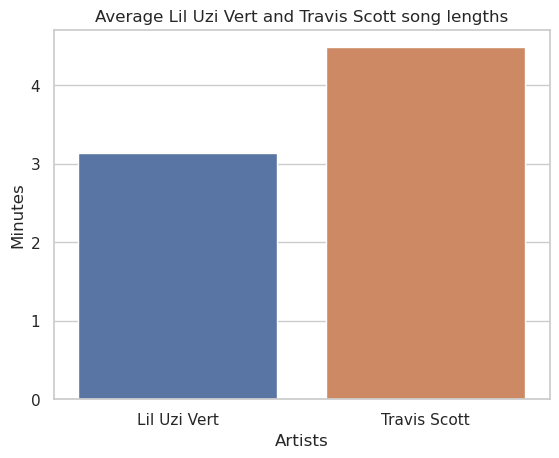

In [19]:
sns.barplot(x=['Lil Uzi Vert', 'Travis Scott'], y=[Uzi_Minutes, Travis_Minutes], data=Uzi_v_Travis)
plt.title('Average Lil Uzi Vert and Travis Scott song lengths')
plt.xlabel('Artists')
plt.ylabel('Minutes')

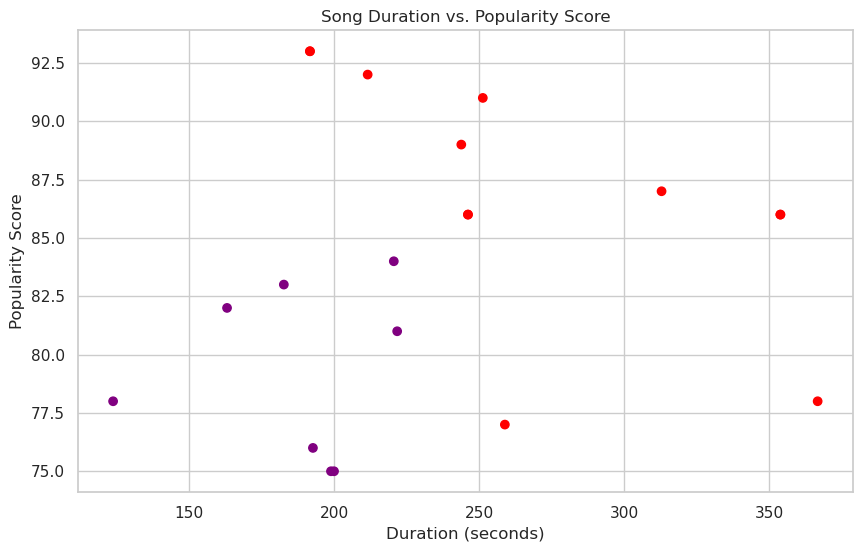

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(
                x=filtered['Duration (ms)'] / 1000,
                y=filtered['Popularity'],
                c=filtered['Artist'].map({'Lil Uzi Vert': 'purple', 'Travis Scott': 'Red'}),
)
plt.title("Song Duration vs. Popularity Score")
plt.xlabel("Duration (seconds)")
plt.ylabel("Popularity Score")
plt.grid(True)
plt.show()

# Using statistics to come to a conclusion:

Since I am attempting to see if there is a relationship between two variables (Song length and popularity), I will be utilizing Spearman's rank correlation coefficient in order to see whether one variable increases as another does or not- A monotonic relationship.

In [21]:
from scipy.stats import spearmanr  

In [22]:
correlation, p_value = spearmanr(filtered['Duration (ms)'], filtered['Popularity'])  
print(f"Rho: {correlation:.2f}, p-value: {p_value:.4f}") 

Rho: 0.11, p-value: 0.6361


As you can see, I rounded the correlation to 2 decimal places, and the p value to 4 for readability and to follow common styles in statistics.

# What do these results mean?

Rho is 0.11, close to 0, implying that the duration of songs has a weak effect on an its popularity. The p-value is also greater than 0.05, meaning that the result wasn't statistically significant. It's safe to say that based on this test, we **fail** to reject the null hypothesis in that song length does not affect popularity.

# Closing Thoughts:

In this short project, I learned to filter the data of two specific categorical variables (The artists) and preform basic mathematical operations on its data in order to then make visualizations with it, using matplotlib and seaborn. 

With the filtered data, I also used scipy.stats to conduct Spearman's rank correlation to check whether I should reject or fail to reject my null hypothesis, to which I found out I should fail to reject.

After examining the results, it was safe to say that *despite* Travis Scott's songs being longer and more popular than Lil Uzi Vert's, **the longer songs did not have any relationship with its popularity**. It is important to realize that "eyeballing" data simply isn't enough to come to a conclusion, and that statistical testing should be used.